# Avocado Project

## Problem Statement:
    This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

 The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data       comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

 Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an     aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in   the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

 The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins)     are not included in this table.

 Some relevant columns in the dataset:

 Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

## Inspiration /Label 

The dataset can be seen in two angles to find the Region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('avocado.csv')

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


## Observation at first look of the dataset:
    1. Date has the format of timestamp
    2. An unnamed column whose value is in serial ID
    3. Different scale of figures like avg. price, total volume, large bags.
    4. Categorical features (Type)
    5. Year & Region wherein we can convert them to numerical 
    6. Except for the unnmaed, all variables are important in predicting

In [4]:
#let's look at basic info of the dataset to get more insight
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


1. Total 18249 rows of data
2. No-null values present
3. Object datatype present in Date, type, region.
4. Integer for year and rest are float.

In [5]:
#will give the number of null-values for each column
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
#lets look at the statistical insight of the dataset
df.describe()     #can use include='all' to show the descriptive stats.

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [7]:
#Let's see how many Xlarge Bags have zeros
xl_bags_values = df['XLarge Bags'].value_counts().index
xl_bags_values

Float64Index([     0.0,     3.33,     6.67,     1.11,      5.0,     10.0,
                 16.67,     2.22,     20.0,    13.33,
              ...
              19436.67,   793.06,  1296.56,   3425.0,   1065.0,     9.95,
                  3.47,    59.32, 16090.51,  4920.17],
             dtype='float64', length=5588)

#### This indicates that in most of region people prefer not to buy XLarge Bags

In [8]:
#Let's see the how many avocados are organic and conventional
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

#### Both are equal in proportion

In [9]:
#let's have a look at the yearly distribution of avocado
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

#### Year 2018 saw the lowest sales of avocados

In [10]:
#How many region are included
df['region'].value_counts()

West                   338
California             338
Midsouth               338
Plains                 338
GrandRapids            338
Philadelphia           338
Southeast              338
PhoenixTucson          338
Spokane                338
Nashville              338
RaleighGreensboro      338
Sacramento             338
RichmondNorfolk        338
HarrisburgScranton     338
NewYork                338
Houston                338
Louisville             338
BaltimoreWashington    338
MiamiFtLauderdale      338
SanFrancisco           338
SanDiego               338
Boston                 338
Syracuse               338
BuffaloRochester       338
Indianapolis           338
Orlando                338
Charlotte              338
Tampa                  338
Pittsburgh             338
StLouis                338
Atlanta                338
Roanoke                338
DallasFtWorth          338
NorthernNewEngland     338
SouthCentral           338
Northeast              338
Albany                 338
G

#### 54 different region are included in dataset

In [11]:
#Let's divide the date into months & day
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [12]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


#### Now we have divided Date into Year, Month & Date

In [13]:
#We will remove first two columns now
df.drop(['Unnamed: 0','Date'], axis = 1, inplace = True)

In [14]:
df.head(6)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany,11,22


In [15]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
Month             int64
Day               int64
dtype: object

## Data Visualisation

<AxesSubplot:xlabel='AveragePrice', ylabel='Count'>

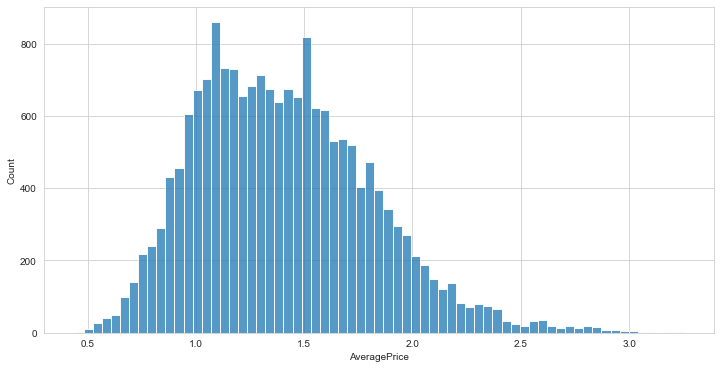

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.histplot(x = 'AveragePrice',data = df)

<AxesSubplot:xlabel='Month', ylabel='count'>

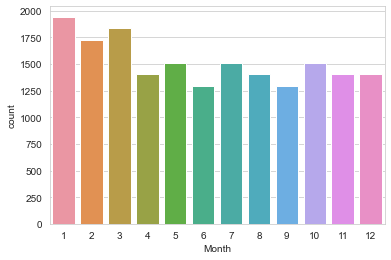

In [17]:
sns.countplot(x='Month', data = df)

#### We can see a downward trend, which means at the start of the year, people are buying more avocados and that figure seems to decrease over the coming months

<AxesSubplot:xlabel='Day', ylabel='count'>

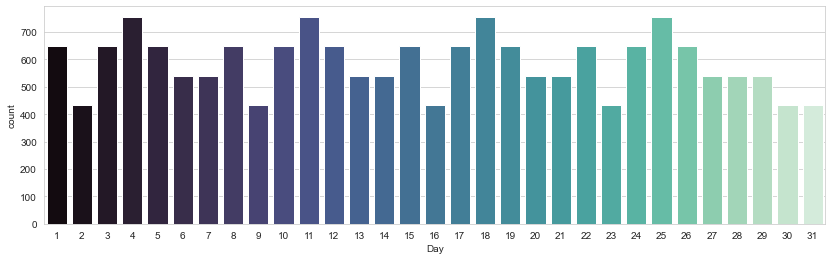

In [18]:
plt.figure(figsize=(14,4))
sns.countplot(x='Day', data = df, palette = 'mako')

#### The observed day starting @4th, 11th, 18th, 25th saw the highest sales registry. A gap of one week. It follows symmetrical distribution around the peak

<AxesSubplot:xlabel='year', ylabel='Month'>

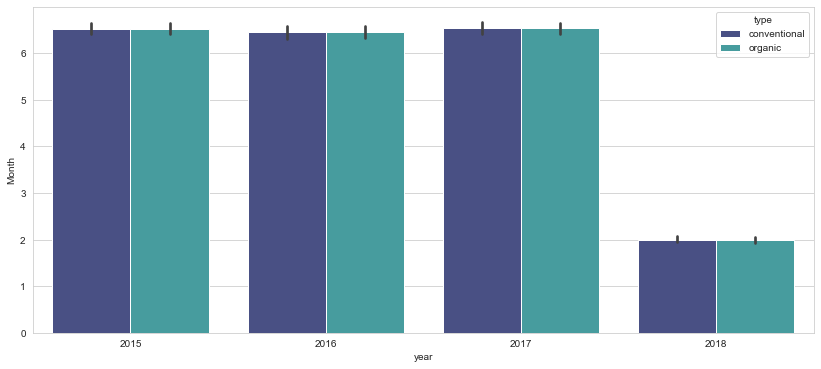

In [19]:
#Let's have a look at avocado sales for each month
plt.figure(figsize=(14,6))
sns.barplot(x='year', y = 'Month', hue = 'type', palette = 'mako', data = df)

#### Well, seems like equal proportion of sales in the year 2015-2017, less in 2018

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

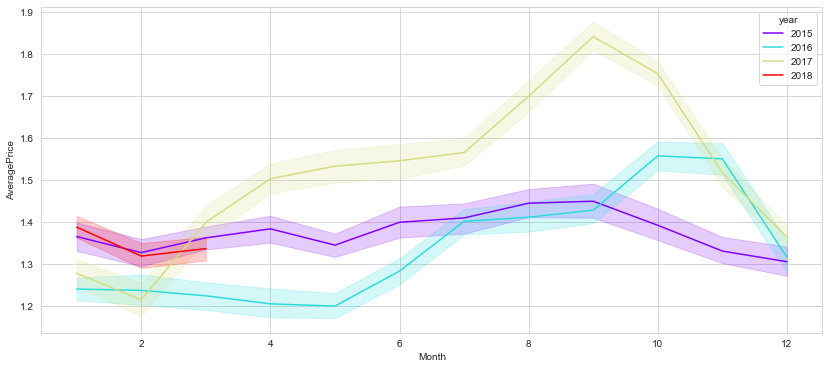

In [20]:
#Avg.price vs month
plt.figure(figsize=(14,6))
sns.lineplot(x = 'Month', y = 'AveragePrice', data = df, hue= 'year', palette = 'rainbow')

#### Avg.price at the start of every year is lowest. Highest price can be seen in 2017 for September(9th) and for the same year it's lowest is reached in 2nd month

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

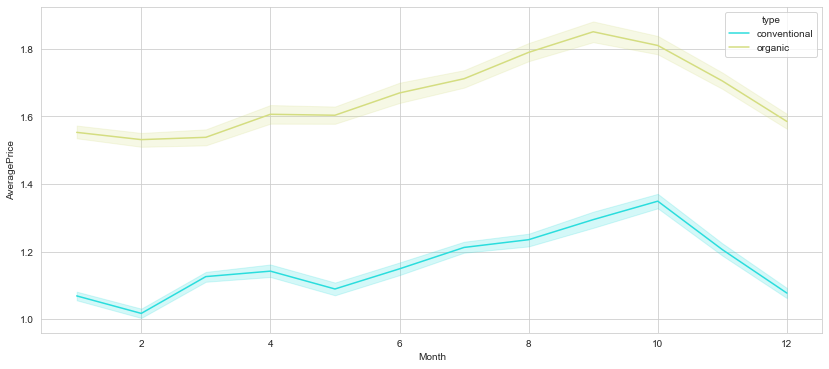

In [21]:
plt.figure(figsize=(14,6))
sns.lineplot(x = 'Month', y = 'AveragePrice', data = df, hue= 'type', palette = 'rainbow')

#### The price of organic type of avocados is higher than conventional at any period of time throughout the year

In [22]:
avo_types = df['type'].value_counts().index
avo_types

Index(['conventional', 'organic'], dtype='object')

In [23]:
#let's look at which type of avocados have high volume
Type = df.groupby('type')['Total Volume'].agg('sum')
Type

type
conventional    1.508722e+10
organic         4.361817e+08
Name: Total Volume, dtype: float64

#### Volume of conventional type of avocados are greater than organic by a large amount

([<matplotlib.patches.Wedge at 0x200c3e02d00>,
 [Text(-0.1953277029861531, 2.894209251473266, 'conventional'),
  Text(2.1953276980337293, 3.1057908044840628, 'organic')],
 [Text(0.2031148646758978, 2.9294728343155105, '97.19%'),
  Text(1.7968851320224863, 3.070527202989375, '2.81%')])

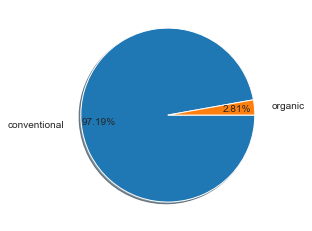

In [24]:
values = [Type['conventional'], Type['organic']]
labels = ['conventional','organic']
plt.pie(x = values, labels = labels, autopct = '%.2f%%', pctdistance = 0.8, labeldistance = 1.2,
       shadow =True, counterclock = False, center = (1,3))

#### As seen in pieplot, volume of conventional avocado is above 97% and that of organic is ~3%

<AxesSubplot:xlabel='type', ylabel='Total Volume'>

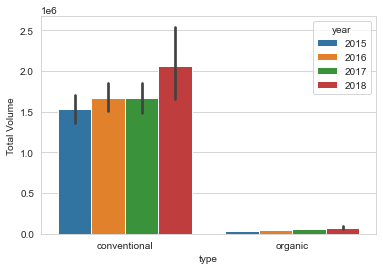

In [25]:
sns.barplot(x='type',data=df,y='Total Volume', hue = 'year')

#### Note: Conventional avocado sold in year 2018 are the highest than the rest of year 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

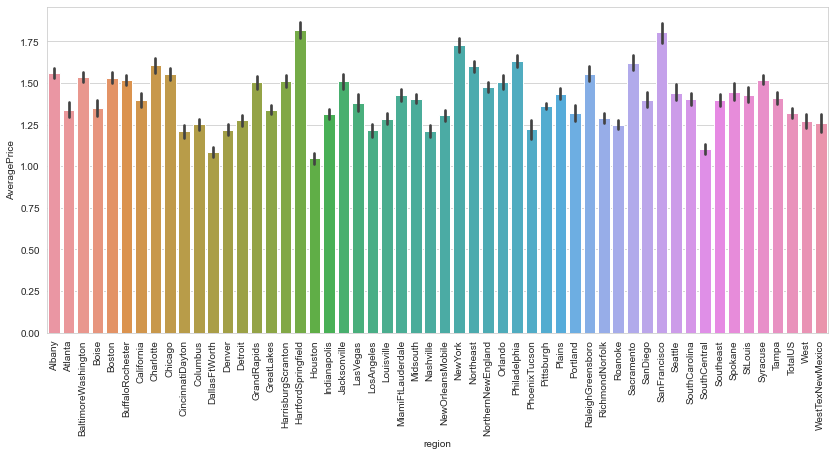

In [26]:
#let's look at the price vs Region
plt.figure(figsize=(14,6))
sns.barplot(x = 'region', y= 'AveragePrice', data =df)
plt.xticks(rotation = 90)

#### Top 10 Region by highest average price:
    1. HartfordSpringfield
    2. SanFrancisco
    3. NewYork
    4. Sacramento
    5. Philadelphia
    6. Charlotte
    7. NorthEast
    8. Albany
    9. Chicago
    10. RaleighGreensboro

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

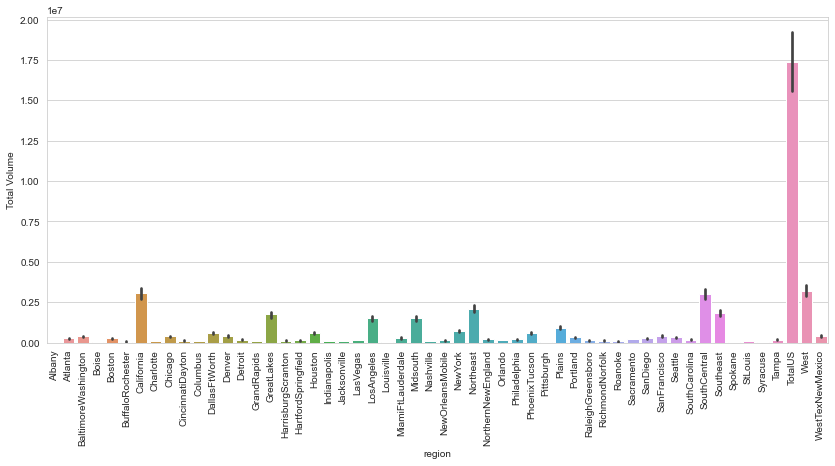

In [27]:
#let's look at the Total Volume vs Region
plt.figure(figsize=(14,6))
sns.barplot(x = 'region', y= 'Total Volume', data =df)
plt.xticks(rotation = 90)

#### Top 5 region according to Total Volume (except TotalUS):
    1. West
    2. California
    3. South Central
    4. NorthEast
    5. SouthEast

In [28]:
"""filtered = df[df.region!='TotalUS']
list(filtered.region.unique())"""

"filtered = df[df.region!='TotalUS']\nlist(filtered.region.unique())"

### Feature Correlation

<AxesSubplot:>

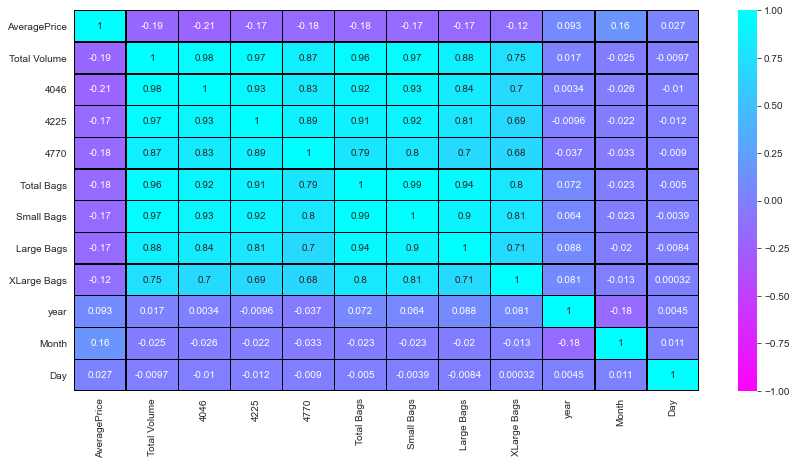

In [29]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), annot = True, linecolor='black',linewidths=0.4,cmap = 'cool_r',vmin=-1, vmax=1)

#### Observations:
    1. All the features are negatively related with average price
    2. The numerical features which are important in predicting price are highly correlated with each other. 
    3. The minimum positive correlation between these features is 0.70. So, the relationship needs to be fixed to avoid overfitting/underfitting.
    4. Year,Month,Day are not significantly related with avg.price. Also, they does not have strong interraltion.

## Multivariate Plot

In [30]:
def pplot(df,i):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i,y='AveragePrice',data=df)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()

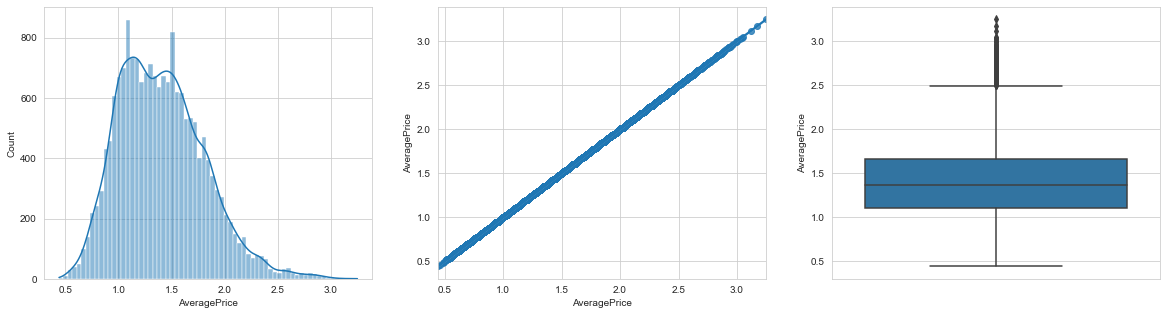

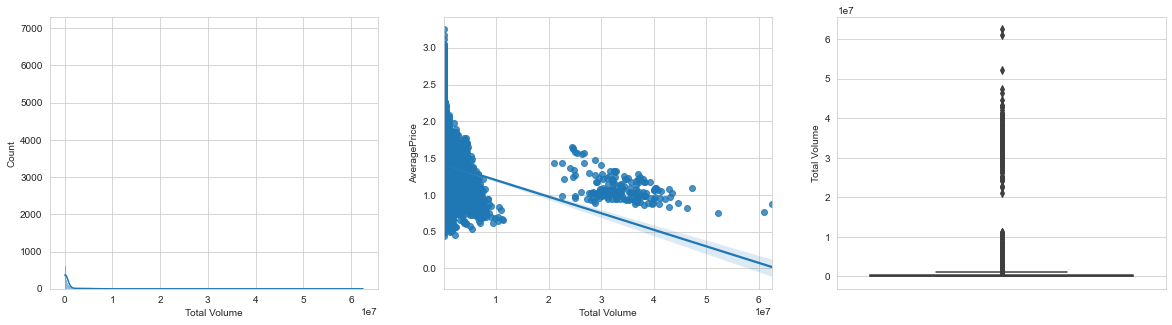

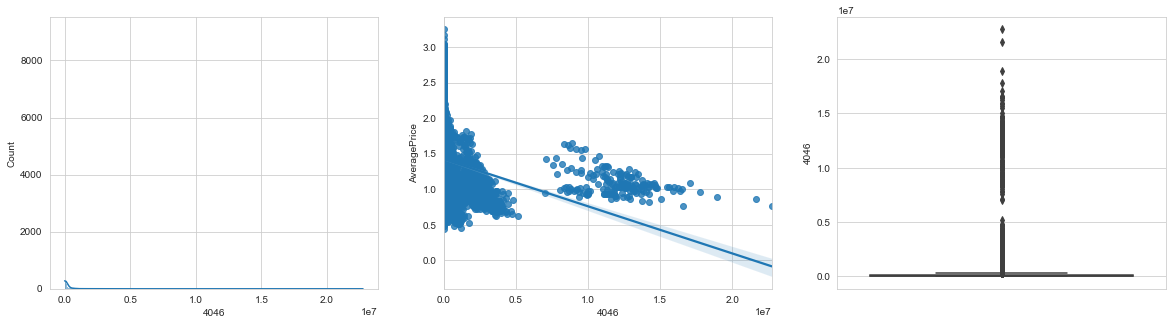

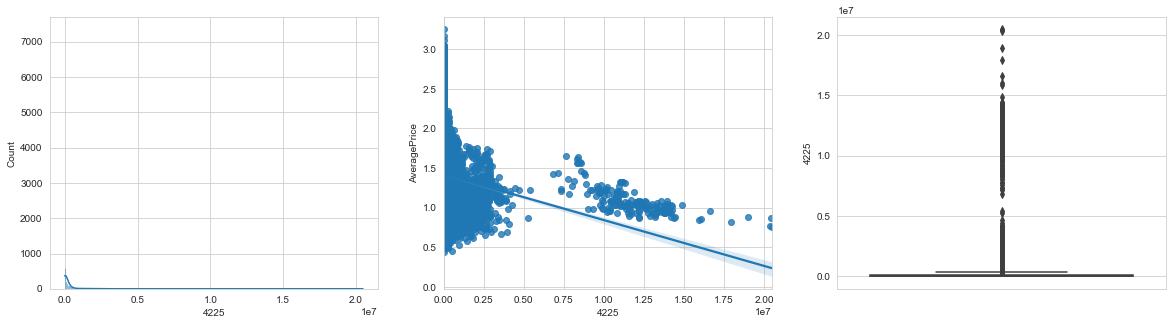

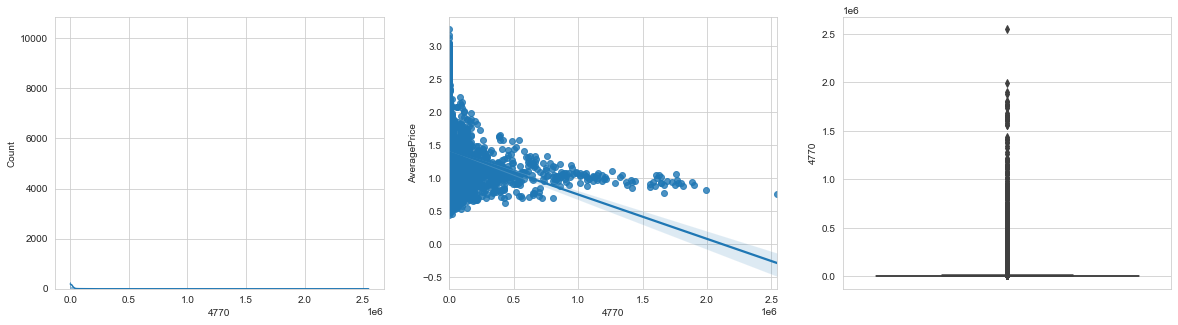

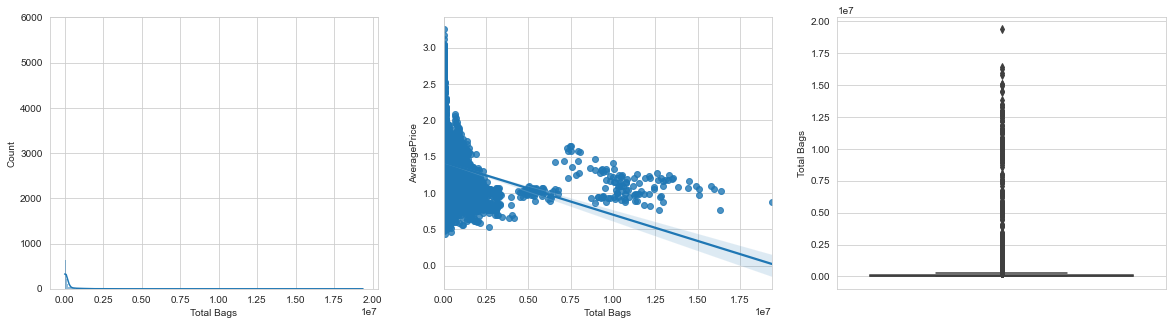

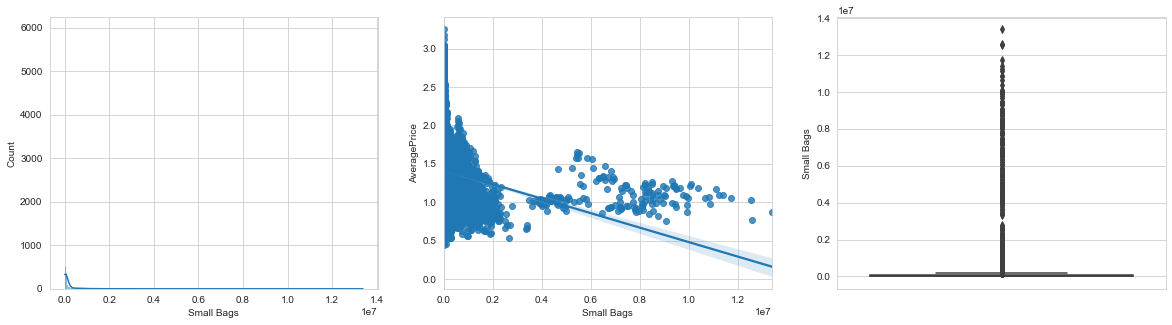

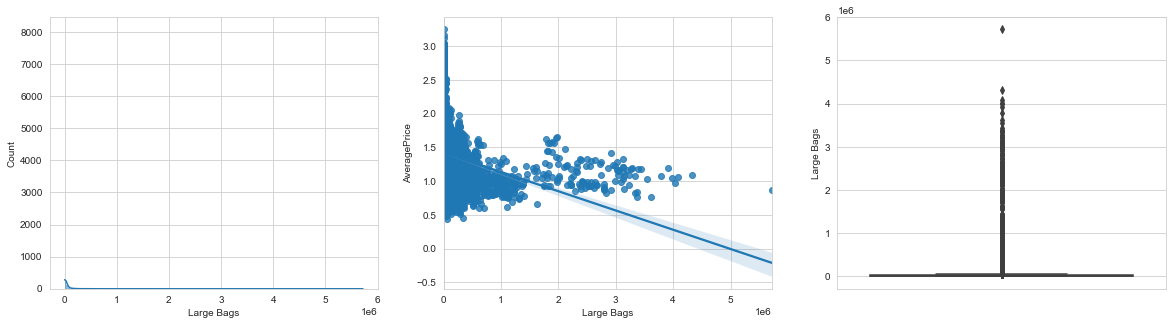

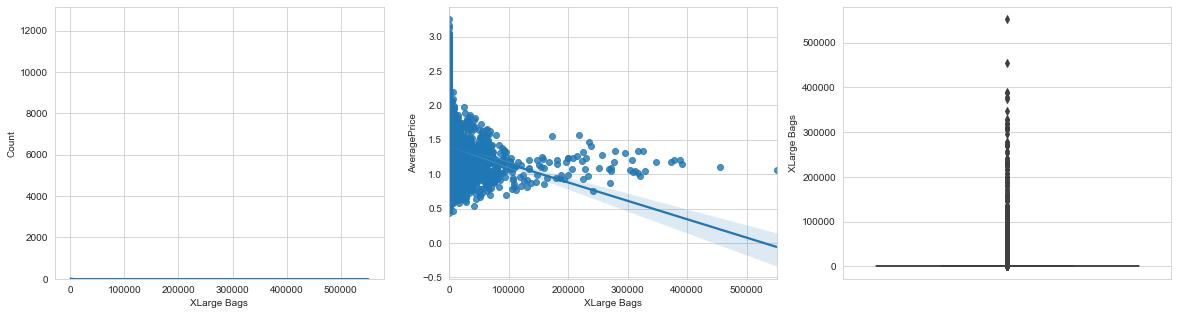

In [31]:
for i in df.columns[:-5]:
    pplot(df,i)

<Figure size 360x1080 with 0 Axes>

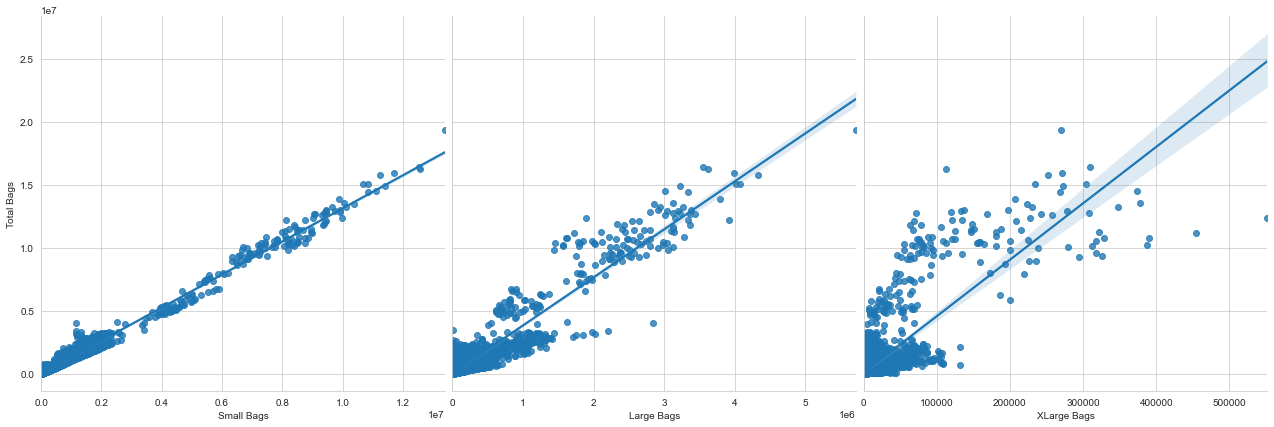

In [32]:
#Analysis of various size of bags with average price.
plt.figure(figsize=(5,15))
sns.pairplot(data = df, x_vars = ['Small Bags','Large Bags','XLarge Bags'], y_vars = 'Total Bags', kind = 'reg', height = 6)

#### Small Bags have strong linear relation, while Large bags has some distorted correlation. Xlarge Bags seems to have poor and non-concluded correlation with Total Bags

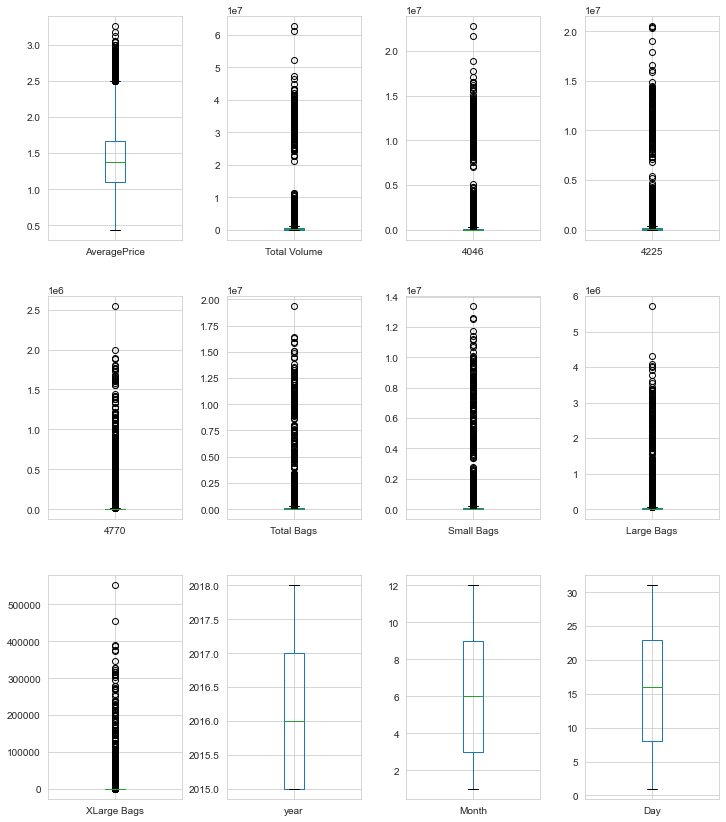

In [33]:
df.plot(kind = 'box', subplots = True, layout = (4,4), figsize=(10,15))
plt.tight_layout(pad=0.4,w_pad=0.7,h_pad=3)

#### We can't remove these outliers. The reason being that it holds an invaluable information and removing them might not yield a better prediction by ML. There is also possibility of overfitting by removing outliers.

# Data Preprocessing

In [34]:
#Converting avocado type to numerical categories and creating dummies
pd.get_dummies(df, columns = ['type'])

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day,type_conventional,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,12,27,1,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,12,20,1,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,12,13,1,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,12,6,1,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,11,29,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,WestTexNewMexico,2,4,0,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,WestTexNewMexico,1,28,0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,WestTexNewMexico,1,21,0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,WestTexNewMexico,1,14,0,1


In [35]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df['type'] = en.fit_transform(df.type)

In [36]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,WestTexNewMexico,1,14


In [37]:
#scaling down value of year
df['year'] = 2022 - df['year']

In [38]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,7,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,7,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,7,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,7,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,7,Albany,11,29


In [39]:
#dropping the day column as it not very useful to us
df.drop('Day', axis=1, inplace = True)

In [40]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month'],
      dtype='object')

In [43]:
#checking the skewness
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year            -0.215339
Month            0.106617
dtype: float64

#### There are several columns whose skew is very high

In [62]:
#we can apply sqrt transformation to the columns whose skewness is very high
df['Total Volume'] = np.sqrt(df['Total Volume'])
df['4046'] = np.sqrt(df['4046'])
df['4225'] = np.sqrt(df['4225'])
df['4770'] = np.sqrt(df['4770'])
df['Total Bags'] = np.sqrt(df['Total Bags'])
df['Small Bags'] = np.sqrt(df['Small Bags'])
df['Large Bags'] = np.sqrt(df['Large Bags'])
df['XLarge Bags'] = np.sqrt(df['XLarge Bags'])

In [65]:
df.skew()

AveragePrice    0.580303
Total Volume    0.145622
4046           -0.319141
4225           -0.395172
4770           -0.125728
Total Bags     -0.190235
Small Bags     -0.604475
Large Bags     -0.574824
XLarge Bags     1.139151
type            0.000329
year           -0.215339
Month           0.106617
dtype: float64

#### still we can see the skewness can be improved

In [64]:
df['Total Volume'] = np.log1p(df['Total Volume'])
df['4046'] = np.log1p(df['4046'])
df['4225'] = np.log1p(df['4225'])
df['4770'] = np.log1p(df['4770'])
df['Total Bags'] = np.log1p(df['Total Bags'])
df['Small Bags'] = np.log1p(df['Small Bags'])
df['Large Bags'] = np.log1p(df['Large Bags'])
df['XLarge Bags'] = np.log1p(df['XLarge Bags'])

## Model Building for predicting Average Price

In [66]:
#creating a dataframe to build model for predicting average price
df1 = df.drop('region', axis =1)

In [67]:
df1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,1.33,2.828502,1.898274,2.789691,1.290427,4.546025,4.540692,2.366180,0.0,0,7,12
1,1.35,2.791503,1.807596,2.743124,1.325372,4.590021,4.584919,2.386347,0.0,0,7,12
2,0.93,2.972602,1.842051,2.953675,1.477024,4.513620,4.507319,2.411958,0.0,0,7,12
3,1.08,2.877214,1.916989,2.855285,1.365785,4.346800,4.335309,2.530952,0.0,0,7,12
4,1.28,2.774500,1.877826,2.738892,1.373830,4.377493,4.361453,2.712057,0.0,0,7,11


## Splitting Dataset

In [68]:
x = df1.drop('AveragePrice', axis=1)
y = df1['AveragePrice']

In [69]:
#Implementing Standard Scaler
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit_transform(x)

array([[-0.12399665, -0.62504349,  0.35662326, ..., -0.99983562,
         1.22128204,  1.64763162],
       [-0.19263655, -0.74455092,  0.28438637, ..., -0.99983562,
         1.22128204,  1.64763162],
       [ 0.14333135, -0.6991415 ,  0.61100568, ..., -0.99983562,
         1.22128204,  1.64763162],
       ...,
       [-0.78757936, -0.58587064, -0.73791013, ...,  1.00016441,
        -1.97050371, -1.46495942],
       [-0.71822048, -0.5156902 , -0.67148124, ...,  1.00016441,
        -1.97050371, -1.46495942],
       [-0.68570127, -0.33220721, -0.75155394, ...,  1.00016441,
        -1.97050371, -1.46495942]])

In [70]:
X = pd.DataFrame(x, columns = x.columns)

In [72]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,2.828502,1.898274,2.789691,1.290427,4.546025,4.540692,2.366180,0.0,0,7,12
1,2.791503,1.807596,2.743124,1.325372,4.590021,4.584919,2.386347,0.0,0,7,12
2,2.972602,1.842051,2.953675,1.477024,4.513620,4.507319,2.411958,0.0,0,7,12
3,2.877214,1.916989,2.855285,1.365785,4.346800,4.335309,2.530952,0.0,0,7,12
4,2.774500,1.877826,2.738892,1.373830,4.377493,4.361453,2.712057,0.0,0,7,11
...,...,...,...,...,...,...,...,...,...,...,...
18244,2.520204,2.044632,1.981470,0.000000,4.763743,4.747626,3.081038,0.0,1,4,2
18245,2.472814,1.927958,2.157986,0.000000,4.577327,4.559668,2.945607,0.0,1,4,1
18246,2.470806,1.927998,2.084111,1.823623,4.584184,4.581950,2.015518,0.0,1,4,1
18247,2.508193,1.981249,2.126934,1.823355,4.660941,4.658679,2.088286,0.0,1,4,1


#### Great!

### Importing dependancies for model building

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [83]:
for i in range(30,80):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    cv_score = cross_val_score(lr, X, y, cv=5, scoring = 'r2')
    print('For Random State: ', i)
    print('Mean absolute error:', MAE(y_test,y_pred))
    print('Root mean squared error:', np.sqrt(MSE(y_test,y_pred)))
    print('R2 Score:', r2_score(y_test,y_pred))
    print('CV score: ',np.mean(cv_score))
    print('\n')


For Random State:  30
Mean absolute error: 0.20845927321436386
Root mean squared error: 0.26708091745710677
R2 Score: 0.5527791157726152
CV score:  0.21571013197183975


For Random State:  31
Mean absolute error: 0.20645236006768813
Root mean squared error: 0.26512084707428585
R2 Score: 0.5543697971297562
CV score:  0.21571013197183975


For Random State:  32
Mean absolute error: 0.20771573928783374
Root mean squared error: 0.2658615661256995
R2 Score: 0.5306049701948885
CV score:  0.21571013197183975


For Random State:  33
Mean absolute error: 0.20720989026142167
Root mean squared error: 0.26624263629328815
R2 Score: 0.5680864519504674
CV score:  0.21571013197183975


For Random State:  34
Mean absolute error: 0.20783003625254626
Root mean squared error: 0.2660679024017424
R2 Score: 0.5625861369850989
CV score:  0.21571013197183975


For Random State:  35
Mean absolute error: 0.2067948919249776
Root mean squared error: 0.2669802799583193
R2 Score: 0.5592123880157747
CV score:  0.2157

#### We can take the random_state as 32 as the difference between R2 score & cv score in minimum

In [84]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((13686, 11), (4563, 11), (13686,), (4563,))

In [86]:
print('Coefficients: ',lr.coef_)
print('Intercept:', lr.intercept_)

Coefficients:  [-0.42453368  0.01195783  0.35153894  0.05565835 -0.19934425  0.11123953
 -0.02843923  0.01203916  0.41940026 -0.10594703  0.02163531]
Intercept: 2.4721169154593494


## Model Training

In [88]:
def CV_score(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    cv_score = cross_val_score(model, x_train, y_train, cv=5, scoring = 'r2' )
    cv_score = np.mean(cv_score)
    
    print('Mean absolute error:', MAE(y_test,y_pred))
    print('Root mean squared error:', np.sqrt(MSE(y_test,y_pred)))
    print('R2 Score:', r2_score(y_test,y_pred))
    print('CV Score:', cv_score)

## Parameter Tuning

### Support Vector Regressor

In [87]:
from sklearn.svm import SVR
svr = SVR()
svr_para = {'C': [0.6,0.7,0.8,0.9,1,1.2],
            'kernel': ['rbf','poly','linear'],
            }
svr_tuning = GridSearchCV(estimator = svr, param_grid = svr_para, cv=5, scoring = 'r2')
svr_tuning.fit(x_train,y_train)
print(svr_tuning.best_params_)
print(svr_tuning.best_score_)

{'C': 0.6, 'kernel': 'rbf'}
0.2807766548367203


In [ ]:
svr = SVR(C = 0.6, kernel = 'rbf')
CV_score(svr)

### Decision Tree Regressor

In [89]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr_para = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}
dtr_tuning = GridSearchCV(dtr, dtr_para, cv=5, scoring = 'r2')
dtr_tuning.fit(x_train,y_train)
print(dtr_tuning.best_params_)
print(dtr_tuning.best_score_)

{'criterion': 'friedman_mse'}
0.7042162721883725


In [91]:
dtr = DecisionTreeRegressor(criterion = 'friedman_mse')
CV_score(dtr)

Mean absolute error: 0.13482577251808023
Root mean squared error: 0.2089579984157262
R2 Score: 0.7339557992734072
CV Score: 0.7009103577052626


### Random Forest Regressor

In [92]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr_para = {'criterion': ['squared_error','poisson','absolute_error'],
           }
rfr_tuning = GridSearchCV( rfr, rfr_para, cv = 5, scoring = 'r2')
rfr_tuning.fit(x_train,y_train)
print(rfr_tuning.best_params_)
print(rfr_tuning.best_score_)

{'criterion': 'squared_error'}
0.858695025969701


In [93]:
rfr = RandomForestRegressor(criterion = 'squared_error')
CV_score(rfr)

Mean absolute error: 0.09922787639710716
Root mean squared error: 0.1427868969937404
R2 Score: 0.8757739978691834
CV Score: 0.8580717055831476


### Extra Tree Regressor

In [95]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr_para = {'criterion': ['squared_error','absolute_error'],
            'max_features': ['auto','sqrt','log2']
           }
etr_tuning = GridSearchCV(etr, etr_para, cv=5, scoring ='r2')
etr_tuning.fit(x_train,y_train)
print(etr_tuning.best_params_)
print(etr_tuning.best_score_)

{'criterion': 'squared_error', 'max_features': 'auto'}
0.8861270366588178


In [101]:
etr = ExtraTreesRegressor(criterion = 'squared_error', max_features = 'auto')
CV_score(etr)

Mean absolute error: 0.08665176419022574
Root mean squared error: 0.12671439460334874
R2 Score: 0.9021664746016762
CV Score: 0.8860070674799632


### SGD Regressor

In [98]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd_para = {'alpha': [1,1.5,2,2,5,3],
            'penalty':['l2','l1'],
           }
sgd_tuning = GridSearchCV(estimator = sgd, param_grid = sgd_para, cv = 5, scoring = 'r2')
sgd_tuning.fit(x_train,y_train)
print(sgd_tuning.best_params_)
print(sgd_tuning.best_score_)

{'alpha': 1, 'penalty': 'l2'}
0.3667795943912458


In [99]:
sgd = SGDRegressor(alpha =1 , penalty = 'l2')
CV_score(sgd)

Mean absolute error: 0.2611511701360456
Root mean squared error: 0.3241447733598232
R2 Score: 0.3598026915320962
CV Score: 0.34589744428706687


### KNeighbors Regressor

In [100]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', metric='minkowski')
CV_score(knr)

Mean absolute error: 0.13814464168310323
Root mean squared error: 0.1871521183597204
R2 Score: 0.786584827484425
CV Score: 0.7653632886422777


#### Extra Tree Regressor seems to work better out of all them

Text(0, 0.5, 'X_test Prediction')

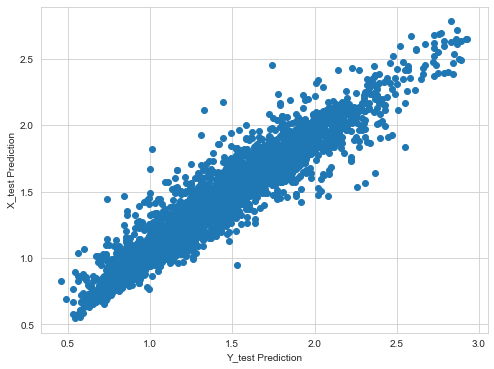

In [103]:
#graph of actual vs predicted value
plt.figure(figsize=(8,6))
plt.scatter( x=y_test, y = etr.predict(x_test))
plt.xlabel('Y_test Prediction')
plt.ylabel('X_test Prediction')

#### Through this scatter plot, the plots are forming a linear line which represents the best fit line

### Saving the model

In [108]:
import pickle
save_file = 'Avocado_price.pkl'
pickle.dump(etr, open(save_file,'wb'))

## Model Building for predicting Region

In [104]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,2.828502,1.898274,2.789691,1.290427,4.546025,4.540692,2.366180,0.0,0,7,Albany,12
1,1.35,2.791503,1.807596,2.743124,1.325372,4.590021,4.584919,2.386347,0.0,0,7,Albany,12
2,0.93,2.972602,1.842051,2.953675,1.477024,4.513620,4.507319,2.411958,0.0,0,7,Albany,12
3,1.08,2.877214,1.916989,2.855285,1.365785,4.346800,4.335309,2.530952,0.0,0,7,Albany,12
4,1.28,2.774500,1.877826,2.738892,1.373830,4.377493,4.361453,2.712057,0.0,0,7,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,2.520204,2.044632,1.981470,0.000000,4.763743,4.747626,3.081038,0.0,1,4,WestTexNewMexico,2
18245,1.71,2.472814,1.927958,2.157986,0.000000,4.577327,4.559668,2.945607,0.0,1,4,WestTexNewMexico,1
18246,1.87,2.470806,1.927998,2.084111,1.823623,4.584184,4.581950,2.015518,0.0,1,4,WestTexNewMexico,1
18247,1.93,2.508193,1.981249,2.126934,1.823355,4.660941,4.658679,2.088286,0.0,1,4,WestTexNewMexico,1


In [106]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df['region'] = en.fit_transform(df['region'])

In [107]:
df['region']

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32

### Splitting Dataset

In [109]:
x1 = df.drop('region', axis =1)
y1 = df['region']

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [112]:
log = LogisticRegression()
for i in range(20,90):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.25, random_state = i)
    log.fit(x_train, y_train)
    y1_pred = log.predict(x_test)
    
    print(f'At Random State: {i}')
    print('Actual Prediction:', round(log.score(x_train, y_train)*100,3))
    print('Model Prediction: ', round(accuracy_score(y_test,y1_pred)*100,3))
    print(confusion_matrix(y_test,y1_pred))
    print('\n')

C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 20
Actual Prediction: 34.122
Model Prediction:  32.369
[[33  0  0 ...  0  0  0]
 [ 0 34  0 ...  0  0  0]
 [ 0  0 25 ...  0  0  0]
 ...
 [ 0  0  0 ... 60  2  0]
 [ 0  0  0 ... 20 49  9]
 [ 1  5  0 ...  0  8  2]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 21
Actual Prediction: 34.144
Model Prediction:  33.487
[[34  0  0 ...  0  0  0]
 [ 0 21  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ... 72 11  0]
 [ 0  0  0 ...  3 55  4]
 [ 0  2  0 ...  0 12  4]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 22
Actual Prediction: 34.283
Model Prediction:  32.61
[[42  0  0 ...  0  0  0]
 [ 0 28  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 57  6  0]
 [ 0  0  0 ... 17 55  3]
 [ 1  3  0 ...  0  9  3]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 23
Actual Prediction: 34.524
Model Prediction:  31.755
[[27  0  0 ...  0  0  0]
 [ 0 23  0 ...  0  0  1]
 [ 0  0 32 ...  0  0  0]
 ...
 [ 0  0  0 ... 55  6  0]
 [ 0  0  0 ...  5 56  3]
 [ 2  6  0 ...  0  9  7]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 24
Actual Prediction: 33.669
Model Prediction:  32.15
[[31  0  0 ...  0  0  0]
 [ 0 28  0 ...  0  0  0]
 [ 0  0 20 ...  0  0  0]
 ...
 [ 0  0  0 ... 73  6  0]
 [ 0  0  0 ...  8 57  7]
 [ 3  4  0 ...  0  6  0]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 25
Actual Prediction: 34.875
Model Prediction:  32.939
[[36  0  0 ...  0  0  0]
 [ 0 23  0 ...  0  0  0]
 [ 0  0 19 ...  0  0  0]
 ...
 [ 0  0  0 ... 63  3  0]
 [ 0  0  0 ... 10 49  4]
 [ 4  3  0 ...  0  5  7]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 26
Actual Prediction: 34.027
Model Prediction:  34.517
[[31  0  0 ...  0  0  0]
 [ 0 33  0 ...  0  0  0]
 [ 0  0 19 ...  0  0  0]
 ...
 [ 0  0  0 ... 67 13  1]
 [ 0  0  0 ...  7 60  3]
 [ 1  2  0 ...  0 10  6]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 27
Actual Prediction: 33.764
Model Prediction:  32.654
[[30  0  0 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 [ 0  0 31 ...  0  0  0]
 ...
 [ 0  0  0 ... 75 11  0]
 [ 0  0  0 ... 23 39  3]
 [ 0  5  0 ...  0  6  5]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 28
Actual Prediction: 34.575
Model Prediction:  34.451
[[38  0  0 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 [ 0  0 31 ...  0  0  1]
 ...
 [ 0  0  0 ... 78  6  0]
 [ 0  0  0 ... 16 46  2]
 [ 4  3  0 ...  0 10  5]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 29
Actual Prediction: 34.787
Model Prediction:  33.837
[[34  0  0 ...  0  0  0]
 [ 0 21  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 58  4  0]
 [ 0  0  0 ... 19 49  3]
 [ 0  2  0 ...  0  8  4]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 30
Actual Prediction: 33.867
Model Prediction:  33.662
[[39  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 32 ...  0  0  1]
 ...
 [ 0  0  0 ... 71  2  0]
 [ 0  0  0 ... 36 42  6]
 [ 0  3  1 ...  0  5  2]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 31
Actual Prediction: 34.722
Model Prediction:  33.377
[[37  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  1  0]
 [ 0  0 16 ...  0  0  0]
 ...
 [ 0  0  0 ... 65  8  0]
 [ 0  0  0 ... 21 44  2]
 [ 3  6  1 ...  0 12  7]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 32
Actual Prediction: 35.036
Model Prediction:  32.983
[[35  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 26 ...  0  0  0]
 ...
 [ 0  0  0 ... 76  0  0]
 [ 0  0  0 ... 26 39  3]
 [ 1  2  0 ...  0  5  6]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 33
Actual Prediction: 34.225
Model Prediction:  32.15
[[28  0  0 ...  0  0  0]
 [ 0 23  0 ...  0  0  0]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  0  0 ... 69  3  0]
 [ 0  0  0 ... 17 50  9]
 [ 0  4  2 ...  0  9  9]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 34
Actual Prediction: 34.057
Model Prediction:  33.837
[[27  0  0 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 [ 0  0 33 ...  0  0  0]
 ...
 [ 0  0  0 ... 70  3  0]
 [ 0  0  0 ... 23 51  4]
 [ 0  5  0 ...  0 11  5]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 35
Actual Prediction: 34.444
Model Prediction:  32.698
[[22  0  0 ...  0  0  0]
 [ 0 31  0 ...  0  0  0]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  0  0 ... 54  9  0]
 [ 0  0  0 ... 11 66  2]
 [ 3  5  0 ...  0  7  1]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 36
Actual Prediction: 34.203
Model Prediction:  32.588
[[32  0  0 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 [ 0  0 29 ...  0  0  0]
 ...
 [ 0  0  0 ... 64  4  0]
 [ 0  0  0 ... 14 49  5]
 [ 2  3  1 ...  0  7  7]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 37
Actual Prediction: 33.859
Model Prediction:  34.013
[[33  0  0 ...  0  0  0]
 [ 0 29  0 ...  0  2  0]
 [ 0  0 28 ...  0  0  0]
 ...
 [ 0  0  0 ... 80  0  0]
 [ 0  0  0 ... 27 38  2]
 [ 3  3  1 ...  0  6  4]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 38
Actual Prediction: 34.685
Model Prediction:  32.259
[[36  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 53  9  0]
 [ 0  0  0 ... 15 40  0]
 [ 1  2  0 ...  0  9  2]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 39
Actual Prediction: 33.859
Model Prediction:  33.377
[[32  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 57 10  0]
 [ 0  0  0 ... 14 51  3]
 [ 0  3  1 ...  0  5  6]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 40
Actual Prediction: 34.831
Model Prediction:  32.04
[[31  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  1  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ... 58 10  0]
 [ 0  0  0 ...  1 51  1]
 [ 2  3  1 ...  0  7  6]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 41
Actual Prediction: 33.852
Model Prediction:  33.794
[[34  0  0 ...  0  0  0]
 [ 0 31  0 ...  0  2  0]
 [ 0  0 29 ...  0  0  1]
 ...
 [ 0  0  0 ... 64  8  0]
 [ 0  0  0 ... 16 38  1]
 [ 1  3  1 ...  0  5  3]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 42
Actual Prediction: 34.174
Model Prediction:  32.939
[[33  0  0 ...  0  0  0]
 [ 0 28  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 63  3  0]
 [ 0  0  0 ... 10 51  1]
 [ 2  2  0 ...  0  7  6]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 43
Actual Prediction: 34.554
Model Prediction:  32.764
[[29  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  0  0 ... 76  7  0]
 [ 0  0  0 ... 15 47  5]
 [ 2  5  2 ...  0  5  7]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 44
Actual Prediction: 35.131
Model Prediction:  32.676
[[32  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 28 ...  0  0  0]
 ...
 [ 0  0  0 ... 81  4  0]
 [ 0  0  0 ... 18 60  4]
 [ 2  5  0 ...  0 11  4]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 45
Actual Prediction: 33.859
Model Prediction:  33.509
[[31  0  0 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 [ 0  0 30 ...  0  0  0]
 ...
 [ 0  0  0 ... 90  1  0]
 [ 0  0  0 ... 25 35  2]
 [ 0  3  0 ...  0  6  1]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 46
Actual Prediction: 34.305
Model Prediction:  32.106
[[23  0  0 ...  0  0  0]
 [ 0 32  0 ...  0  0  0]
 [ 0  0 27 ...  0  0  1]
 ...
 [ 0  0  0 ... 65  1  0]
 [ 0  0  0 ... 21 52  1]
 [ 3  6  0 ...  0 10  0]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 47
Actual Prediction: 34.561
Model Prediction:  33.772
[[30  0  0 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 [ 0  0 27 ...  0  0  1]
 ...
 [ 0  0  0 ... 69  9  0]
 [ 0  0  0 ... 13 49  1]
 [ 0  6  0 ...  0 11  6]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 48
Actual Prediction: 34.393
Model Prediction:  32.764
[[35  0  0 ...  0  0  0]
 [ 0 26  0 ...  0  0  0]
 [ 0  0 29 ...  0  0  0]
 ...
 [ 0  0  0 ... 69  1  0]
 [ 0  0  0 ... 11 49  3]
 [ 4  5  1 ...  0  8  3]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 49
Actual Prediction: 33.874
Model Prediction:  31.646
[[29  0  0 ...  0  0  0]
 [ 0 22  0 ...  0  0  0]
 [ 0  0 31 ...  0  0  0]
 ...
 [ 0  0  0 ... 51 14  0]
 [ 0  0  0 ... 10 58  1]
 [ 0  3  2 ...  0 15  9]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 50
Actual Prediction: 34.524
Model Prediction:  32.829
[[32  0  0 ...  0  0  0]
 [ 0 31  0 ...  0  0  0]
 [ 0  0 27 ...  0  0  0]
 ...
 [ 0  0  0 ... 73 15  0]
 [ 0  0  0 ... 19 49  1]
 [ 2  0  1 ...  0  4  9]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 51
Actual Prediction: 33.896
Model Prediction:  33.728
[[35  0  0 ...  0  0  0]
 [ 0 23  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 78  7  0]
 [ 0  0  0 ... 19 48  2]
 [ 2  9  1 ...  0  8  5]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 52
Actual Prediction: 34.663
Model Prediction:  32.566
[[35  0  0 ...  0  0  0]
 [ 0 32  0 ...  0  0  0]
 [ 0  0 30 ...  0  0  0]
 ...
 [ 0  0  0 ... 63  8  0]
 [ 0  0  0 ... 22 38  5]
 [ 2  5  2 ...  0  5  6]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 53
Actual Prediction: 34.152
Model Prediction:  32.764
[[35  0  0 ...  0  0  0]
 [ 0 16  0 ...  0  0  0]
 [ 0  0 29 ...  0  0  1]
 ...
 [ 0  0  0 ... 90  4  0]
 [ 0  0  0 ... 32 43  1]
 [ 0  4  2 ...  0  8  4]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 54
Actual Prediction: 35.255
Model Prediction:  32.435
[[37  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 28 ...  0  0  0]
 ...
 [ 0  0  0 ... 71  4  0]
 [ 0  0  0 ...  7 45  7]
 [ 0  4  0 ...  0  7  8]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 55
Actual Prediction: 34.21
Model Prediction:  32.632
[[33  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  2  0]
 [ 0  0 19 ...  0  0  0]
 ...
 [ 0  0  0 ... 58 14  0]
 [ 0  0  0 ...  8 66  2]
 [ 1  4  1 ...  0  9  2]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 56
Actual Prediction: 34.305
Model Prediction:  31.909
[[35  0  0 ...  0  0  0]
 [ 1 28  0 ...  0  1  0]
 [ 0  0 30 ...  0  0  0]
 ...
 [ 0  0  0 ... 66  7  0]
 [ 0  0  0 ... 21 53  1]
 [ 4  2  0 ...  0  9  4]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 57
Actual Prediction: 33.604
Model Prediction:  32.632
[[29  0  0 ...  0  0  0]
 [ 0 23  0 ...  0  0  0]
 [ 0  0 32 ...  0  0  0]
 ...
 [ 0  0  0 ... 65  7  0]
 [ 0  0  0 ... 23 47  2]
 [ 2  3  1 ...  0  8  5]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 58
Actual Prediction: 33.699
Model Prediction:  33.114
[[35  0  0 ...  0  0  0]
 [ 0 29  0 ...  0  2  0]
 [ 0  0 19 ...  0  0  0]
 ...
 [ 0  0  0 ... 71  0  0]
 [ 0  0  0 ... 21 53  5]
 [ 3  2  1 ...  0  7 10]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 59
Actual Prediction: 33.757
Model Prediction:  33.815
[[36  0  0 ...  0  0  0]
 [ 0 22  0 ...  0  0  0]
 [ 0  0 18 ...  0  0  0]
 ...
 [ 0  0  0 ... 71  6  0]
 [ 0  0  0 ... 14 49  1]
 [ 1  7  1 ...  0  8  5]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 60
Actual Prediction: 34.013
Model Prediction:  33.815
[[39  0  0 ...  0  0  0]
 [ 0 22  0 ...  0  0  0]
 [ 0  0 22 ...  0  0  1]
 ...
 [ 0  0  0 ... 86  2  0]
 [ 0  0  0 ... 17 46  2]
 [ 1  1  1 ...  0  8  8]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 61
Actual Prediction: 33.384
Model Prediction:  33.881
[[32  0  0 ...  0  0  0]
 [ 0 26  0 ...  0  0  2]
 [ 0  0 37 ...  0  0  0]
 ...
 [ 0  0  0 ... 76  7  0]
 [ 0  0  0 ... 13 58  3]
 [ 2  7  0 ...  0  5  8]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 62
Actual Prediction: 33.779
Model Prediction:  33.75
[[36  0  0 ...  0  0  0]
 [ 0 27  0 ...  0  0  0]
 [ 0  0 27 ...  0  0  0]
 ...
 [ 0  0  0 ... 72  0  0]
 [ 0  0  0 ... 16 44  1]
 [ 1  5  1 ...  0  8  3]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 63
Actual Prediction: 34.744
Model Prediction:  33.29
[[31  0  0 ...  0  0  0]
 [ 0 28  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 68  7  0]
 [ 0  0  0 ...  4 72  3]
 [ 1  4  1 ...  0 11  3]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 64
Actual Prediction: 34.137
Model Prediction:  33.947
[[35  0  0 ...  0  0  0]
 [ 0 31  0 ...  0  0  0]
 [ 0  0 25 ...  0  0  0]
 ...
 [ 0  0  0 ... 80  1  0]
 [ 0  0  0 ... 40 17  8]
 [ 1  4  1 ...  1  5  7]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 65
Actual Prediction: 33.56
Model Prediction:  32.347
[[33  0  0 ...  0  0  0]
 [ 0 26  0 ...  0  1  0]
 [ 0  0 27 ...  0  0  1]
 ...
 [ 0  0  0 ... 69  3  0]
 [ 0  0  0 ... 30 27  1]
 [ 0  4  2 ...  0  8  5]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 66
Actual Prediction: 34.634
Model Prediction:  33.07
[[32  0  0 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 [ 0  0 26 ...  0  0  0]
 ...
 [ 0  0  0 ... 67  2  0]
 [ 0  0  0 ... 11 61  3]
 [ 3  5  1 ...  0  5  6]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 67
Actual Prediction: 34.912
Model Prediction:  32.764
[[28  0  0 ...  0  0  0]
 [ 0 38  0 ...  0  0  0]
 [ 0  0 28 ...  0  0  0]
 ...
 [ 0  0  0 ... 89  2  0]
 [ 0  0  0 ... 28 35  4]
 [ 1  1  1 ...  0  6  3]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 68
Actual Prediction: 35.087
Model Prediction:  31.975
[[29  0  0 ...  0  0  0]
 [ 0 22  0 ...  0  0  0]
 [ 0  0 25 ...  0  0  1]
 ...
 [ 0  0  0 ... 65  8  0]
 [ 0  0  0 ...  9 62  2]
 [ 2  4  0 ...  0  9  7]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 69
Actual Prediction: 34.868
Model Prediction:  34.144
[[37  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ... 75  3  0]
 [ 0  0  0 ...  7 46  1]
 [ 1  3  0 ...  0  8  3]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 70
Actual Prediction: 33.465
Model Prediction:  33.027
[[33  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 34 ...  0  0  0]
 ...
 [ 0  0  0 ... 59  4  0]
 [ 0  0  0 ... 17 36  3]
 [ 3  3  0 ...  0  6  6]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 71
Actual Prediction: 33.151
Model Prediction:  31.186
[[37  0  0 ...  0  0  0]
 [ 0 18  0 ...  0  0  0]
 [ 0  0 32 ...  0  0  0]
 ...
 [ 0  0  0 ... 68  8  0]
 [ 0  0  0 ... 25 41  0]
 [ 1  4  1 ...  0  8  6]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 72
Actual Prediction: 34.188
Model Prediction:  32.939
[[31  0  0 ...  0  0  0]
 [ 0 37  0 ...  0  0  1]
 [ 0  0 27 ...  0  0  0]
 ...
 [ 0  0  0 ... 69  5  0]
 [ 0  0  0 ... 25 35  6]
 [ 2  5  0 ...  0  3  8]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 73
Actual Prediction: 34.269
Model Prediction:  33.377
[[29  0  0 ...  0  0  0]
 [ 1 21  0 ...  0  0  0]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  0  0 ... 67  4  0]
 [ 0  0  0 ... 19 48  1]
 [ 0 10  1 ...  0  6  8]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 74
Actual Prediction: 34.298
Model Prediction:  32.676
[[35  0  0 ...  0  0  0]
 [ 0 26  0 ...  0  1  0]
 [ 0  0 33 ...  0  0  1]
 ...
 [ 0  0  0 ... 73  2  0]
 [ 0  0  0 ... 21 39  1]
 [ 0  2  1 ...  0 11  3]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 75
Actual Prediction: 33.954
Model Prediction:  32.807
[[35  0  0 ...  0  0  0]
 [ 0 27  0 ...  0  0  0]
 [ 0  0 33 ...  0  0  0]
 ...
 [ 0  0  0 ... 70 13  0]
 [ 0  0  0 ... 13 57  8]
 [ 3  4  2 ...  0  8  2]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 76
Actual Prediction: 34.912
Model Prediction:  33.005
[[38  0  0 ...  0  0  0]
 [ 0 26  0 ...  0  0  0]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  0  0 ... 64  1  0]
 [ 0  0  0 ...  9 44  4]
 [ 3  5  1 ...  0  9  4]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 77
Actual Prediction: 34.144
Model Prediction:  32.216
[[30  0  0 ...  0  0  0]
 [ 1 35  0 ...  0  0  0]
 [ 0  0 25 ...  0  0  0]
 ...
 [ 0  0  0 ... 68 14  0]
 [ 0  0  0 ... 20 40  1]
 [ 0  5  1 ...  0  3  7]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 78
Actual Prediction: 34.181
Model Prediction:  33.421
[[37  0  0 ...  0  0  0]
 [ 0 27  0 ...  0  0  2]
 [ 0  0 27 ...  0  0  0]
 ...
 [ 0  0  0 ... 72  0  0]
 [ 0  0  0 ... 33 30  1]
 [ 3  5  1 ...  0  1  3]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 79
Actual Prediction: 34.327
Model Prediction:  33.224
[[37  0  0 ...  0  0  0]
 [ 0 26  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 61  3  0]
 [ 0  0  0 ... 26 46  3]
 [ 0  2  1 ...  0 11  3]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 80
Actual Prediction: 33.648
Model Prediction:  31.865
[[39  0  0 ...  0  0  0]
 [ 0 27  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 52  5  0]
 [ 0  0  0 ...  8 42  6]
 [ 1  1  0 ...  0  6  7]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 81
Actual Prediction: 34.641
Model Prediction:  32.216
[[33  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 69  2  0]
 [ 0  0  0 ... 24 41  6]
 [ 1  3  1 ...  0  7  5]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 82
Actual Prediction: 33.553
Model Prediction:  33.574
[[38  0  0 ...  0  0  0]
 [ 0 29  0 ...  0  0  1]
 [ 0  0 29 ...  0  0  0]
 ...
 [ 0  0  0 ... 67 13  0]
 [ 0  0  0 ... 21 36  1]
 [ 1  3  1 ...  0  3  4]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 83
Actual Prediction: 33.64
Model Prediction:  31.668
[[33  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 27 ...  0  0  1]
 ...
 [ 0  0  0 ... 77  3  0]
 [ 0  0  0 ... 21 40  6]
 [ 1  2  0 ...  0  4 10]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 84
Actual Prediction: 34.071
Model Prediction:  32.172
[[35  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 25 ...  0  0  1]
 ...
 [ 0  0  0 ... 70  6  0]
 [ 0  0  0 ... 29 35  4]
 [ 3  3  1 ...  0  8  5]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 85
Actual Prediction: 34.568
Model Prediction:  33.531
[[31  0  0 ...  0  0  0]
 [ 0 31  0 ...  0  0  0]
 [ 0  0 28 ...  0  0  0]
 ...
 [ 0  0  0 ... 80  2  0]
 [ 0  0  0 ... 28 45  2]
 [ 0  5  1 ...  0 14  3]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 86
Actual Prediction: 33.867
Model Prediction:  32.238
[[28  0  0 ...  0  0  0]
 [ 0 20  0 ...  0  0  0]
 [ 0  0 31 ...  0  0  0]
 ...
 [ 0  0  0 ... 67  7  0]
 [ 0  0  0 ... 28 42  1]
 [ 2  3  0 ...  0  9  5]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 87
Actual Prediction: 34.649
Model Prediction:  33.355
[[30  0  0 ...  0  0  0]
 [ 0 28  0 ...  0  0  0]
 [ 0  0 27 ...  0  0  0]
 ...
 [ 0  0  0 ... 62 11  0]
 [ 0  0  0 ... 17 44  3]
 [ 2  3  0 ...  0 11  1]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At Random State: 88
Actual Prediction: 34.393
Model Prediction:  34.144
[[37  0  0 ...  0  0  0]
 [ 0 20  0 ...  0  0  0]
 [ 0  0 28 ...  0  0  0]
 ...
 [ 0  0  0 ... 68  2  0]
 [ 0  0  0 ... 19 53  2]
 [ 0  3  0 ...  0 10  6]]


At Random State: 89
Actual Prediction: 34.597
Model Prediction:  33.443
[[37  0  0 ...  0  0  0]
 [ 0 26  0 ...  0  0  0]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  0  0 ... 66  7  0]
 [ 0  0  0 ... 14 39  2]
 [ 4  5  0 ...  0  6  3]]




C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [118]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((13686, 12), (4563, 12), (13686,), (4563,))

In [142]:
def CV_score(model):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=.25, random_state = 45)
    model.fit(x_train,y_train)
    score = model.score(x_train, y_train)
    y1_pred = model.predict(x_test)
    cv_score = cross_val_score(model, x_train, y_train, cv=10)
    
    print('Actual score:', score*100)
    print('Predicted Score:', accuracy_score(y_test,y1_pred)*100)
    print('CV score:',cv_score.mean()*100)
    print(confusion_matrix(y_test, y1_pred))

In [133]:
log_reg = LogisticRegressionDecision Tree Classifier()
CV_score(log_reg)

C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Actual score: 33.85941838374982
Predicted Score: 33.50865658557966


C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

CV score: 32.94609331949304


C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree Classifier

In [136]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_para = {'criterion': ['gini','entropy'], 
            'splitter':['best','random'],
            'max_depth': [10,20,30,40,50],
            'min_samples_split': [2,4,6,8,10],
            }
dtc_tuning = GridSearchCV(estimator = dtc, param_grid = dtc_para, cv=5, scoring='accuracy')

dtc_tuning.fit(x_train,y_train)
print(dtc_tuning.best_params_)
print(dtc_tuning.best_score_)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2, 'splitter': 'best'}
0.7909541165848625


In [143]:
dtc = DecisionTreeClassifier( criterion = 'entropy', max_depth = 20, min_samples_split = 2, splitter = 'best')
CV_score(dtc)

Actual score: 99.98538652637731
Predicted Score: 79.9693184308569
CV score: 80.07463188650954
[[69  0  0 ...  0  0  0]
 [ 0 59  0 ...  0  0  3]
 [ 0  0 70 ...  0  0  4]
 ...
 [ 0  0  0 ... 93  0  0]
 [ 0  0  0 ...  0 73  0]
 [ 0  0  3 ...  0  0 48]]


## MultionomialNB

In [144]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb=MultinomialNB()
mnb_para = {'alpha':[1.0,0.1,1.0e-2,1.0e-3, 1.0e-4],
            'fit_prior':[True,False]}
mnb_tuning = GridSearchCV(estimator = mnb, param_grid = mnb_para,cv=5, scoring = 'accuracy')
mnb_tuning.fit(x_train,y_train)
print(mnb_tuning.best_params_)
print(mnb_tuning.best_score_)

{'alpha': 0.1, 'fit_prior': True}
0.06598003764658911


In [145]:
mnb = MultinomialNB(alpha = 0.1, fit_prior = True)
CV_score(mnb)

Actual score: 7.145988601490575
Predicted Score: 6.026736795967565
CV score: 6.663767252316327
[[ 3  0  0 ...  1  0  0]
 [ 0  1  0 ...  5  1  2]
 [ 3  0  0 ...  9  0  0]
 ...
 [ 0  0  0 ... 42  0  0]
 [ 0  0  0 ... 27  4  0]
 [ 1  0  0 ...  7  1  0]]


## KNeighborsClassifier

In [147]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_para = {'n_neighbors': list(range(1,10)),
            'weights': ['uniform','distance'],
            'algorithm': ['auto','ball_tree','kd_tree','brute'],
            'metric':['euclidean','minkowski']}
knn_tuning = GridSearchCV(estimator = knn, param_grid = knn_para)
knn_tuning.fit(x_train,y_train)
print(knn_tuning.best_params_)
print(knn_tuning.best_score_)

{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.6922395343629878


In [148]:
knn = KNeighborsClassifier(algorithm = 'auto', metric = 'euclidean', n_neighbors = 1, weights = 'uniform')
CV_score(knn)

Actual score: 100.0
Predicted Score: 73.0440499671269
CV score: 70.92647234716937
[[73  0  0 ...  0  0  0]
 [ 0 49  0 ...  0  0  2]
 [ 0  0 56 ...  0  0  1]
 ...
 [ 0  0  0 ... 95  0  0]
 [ 0  0  0 ...  2 69  0]
 [ 0  0  0 ...  0  0 52]]


## Support Vector Classifier

In [149]:
from sklearn.svm import SVC
svc = SVC()
svc_para = {'C': [0.9,1,1.2],
            'kernel': ['rbf','poly','linear'],
            }
svc_tuning = GridSearchCV(estimator = svc, param_grid = svc_para, scoring = 'accuracy')
svc_tuning.fit(x_train,y_train)
print(svc_tuning.best_params_)
print(svc_tuning.best_score_)

{'C': 1.2, 'kernel': 'linear'}
0.7077295071488754


In [150]:
svc = SVC(C=1.4, kernel = 'linear')
CV_score(svc)

Actual score: 74.19991231915827
Predicted Score: 72.84681130834977
CV score: 72.00062259984024
[[72  0  0 ...  0  0  0]
 [ 0 46  0 ...  0  0  0]
 [ 0  0 78 ...  0  0  1]
 ...
 [ 0  0  0 ... 95  0  0]
 [ 0  0  0 ...  1 71  0]
 [ 0  2  1 ...  0  0 31]]


## Random Forest Classifier

In [153]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc_para = {'n_estimators':[100,125,150,200],
            'criterion': ['gini','entropy'],
           'max_features': ['auto','sqrt','log2']}
rfc_tuning = GridSearchCV(estimator = rfc, param_grid = rfc_para, cv = 5, scoring = 'accuracy')
rfc_tuning.fit(x_train,y_train)
print(rfc_tuning.best_params_)
print(rfc_tuning.best_score_)

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 200}
0.9065466527068795


In [154]:
rfc = RandomForestClassifier(criterion = 'entropy', max_features = 'auto', n_estimators = 200)
CV_score(rfc)

Actual score: 100.0
Predicted Score: 91.19000657462196
CV score: 91.20275503099116
[[82  0  0 ...  0  0  0]
 [ 0 72  0 ...  0  0  1]
 [ 0  0 78 ...  0  0  0]
 ...
 [ 0  0  0 ... 95  0  0]
 [ 0  0  0 ...  2 77  0]
 [ 0  0  0 ...  0  0 71]]


## SGDClassifier

In [156]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd_para = {'alpha': [1,0.1,1.0e-2,1.0e-3,1.0e-4,1.0e-5],
            'penalty':['l2','l1'],
            'learning_rate': ['optimal','constant','invscaling']}
sgd_tuning = GridSearchCV(estimator = sgd, param_grid = sgd_para, cv = 5, scoring = 'accuracy')
sgd_tuning.fit(x_train,y_train)
print(sgd_tuning.best_params_)
print(sgd_tuning.best_score_)

C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 883, in fit
    return self._fit(
  File "C:\Users\Nitin Patel\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 649, in _fit
    self._validate_params()
  

{'alpha': 1e-05, 'learning_rate': 'optimal', 'penalty': 'l1'}
0.26625711611541425


In [158]:
sgd = SGDClassifier(alpha = 1e-05,penalty = 'l1', learning_rate = 'optimal')
CV_score(sgd)

Actual score: 25.442057577086075
Predicted Score: 25.61911023449485
CV score: 26.026803830857887
[[12  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 16 ...  0  0  1]
 ...
 [ 0  0  0 ... 69 12  0]
 [ 0  0  0 ...  1 47  2]
 [ 0  0  0 ...  0  0  6]]


## We can consider Random Forest Classifier out of all the model

In [161]:
import pickle
saved_file = 'avocado_region.pkl'
pickle.dump(rfc, open(saved_file,'wb'))